# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_csv('TSNE_Exercise_3.csv')
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
13406,-4.012847,-49.510338,8.620812,0,0
144123,5.410048,-29.320078,-19.340828,0,0
183629,34.564114,-5.440762,6.262523,0,0
46717,-7.474371,-23.366385,12.391410,0,0
4237,-39.811300,-8.246175,0.420366,0,0


In [3]:
raw_data.shape

(195668, 5)

In [4]:
raw_data.columns

Index(['TSNE Element 1', 'TSNE Element 2', 'TSNE Element 3', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195668 entries, 0 to 195667
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  195668 non-null  float64
 1   TSNE Element 2  195668 non-null  float64
 2   TSNE Element 3  195668 non-null  float64
 3   stimulus        195668 non-null  int64  
 4   restimulus      195668 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 7.5 MB


In [6]:
raw_data.describe(include='all')

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
count,195668.000000,195668.000000,195668.000000,195668.000000,195668.000000
mean,0.732000,0.803923,-1.590988,5.614638,5.614638
std,20.332201,21.149440,21.413923,7.635703,7.635703
min,-48.582947,-51.655360,-51.395275,0.000000,0.000000
25%,-14.230341,-15.482663,-17.890354,0.000000,0.000000
50%,0.314487,0.738006,-1.222801,0.000000,0.000000
75%,16.726267,17.461449,15.595553,11.000000,11.000000
max,51.811980,50.032684,46.387203,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     106749
23      4519
21      4492
22      4487
6       4295
14      4239
11      4211
16      4095
10      4036
18      4013
17      3905
12      3872
19      3836
20      3831
5       3775
2       3725
3       3724
4       3717
13      3584
1       3558
15      3303
9       3256
8       3232
7       3214
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

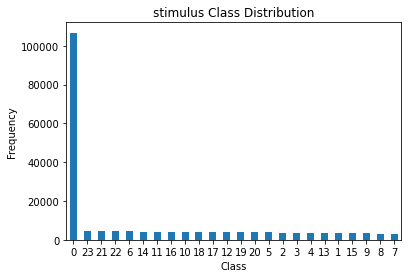

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
32478,-33.076850,-31.771965,20.111822,0,0
1015,32.429703,6.926289,-35.406933,1,1
70696,-27.651020,-2.462769,26.221000,0,0
133271,19.151820,20.958082,16.153597,0,0
80008,-1.338684,-39.098007,9.383146,0,0


In [11]:
raw_data.shape

(195668, 5)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195668 entries, 0 to 195667
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  195668 non-null  float64
 1   TSNE Element 2  195668 non-null  float64
 2   TSNE Element 3  195668 non-null  float64
 3   stimulus        195668 non-null  int64  
 4   restimulus      195668 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 7.5 MB


In [13]:
print(raw_data.isnull().any())

TSNE Element 1    False
TSNE Element 2    False
TSNE Element 3    False
stimulus          False
restimulus        False
dtype: bool


In [14]:
X = raw_data.iloc[:,0:3]
y = raw_data.stimulus

# Splitting data for training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 39)

# Machine Learning Models

# Decision Tree

In [16]:
from sklearn import tree
import time
start_time = time.time()
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

11.13578748703003 seconds


In [17]:
y_pred1 = tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 92.64067051668626


Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     10731
           1       0.91      0.89      0.90       379
           2       0.89      0.86      0.88       365
           3       0.87      0.89      0.88       350
           4       0.88      0.86      0.87       357
           5       0.83      0.84      0.84       391
           6       0.89      0.84      0.86       431
           7       0.80      0.79      0.80       333
           8       0.84      0.85      0.85       321
           9       0.88      0.91      0.90       350
          10       0.89      0.89      0.89       403
          11       0.84      0.86      0.85       393
          12       0.89      0.87      0.88       395
          13       0.85      0.85      0.85       375
          14       0.82      0.85      0.83       417
          15       0.80      0.81      0.81       319
          16       0.85      0.88      0.87       410
 

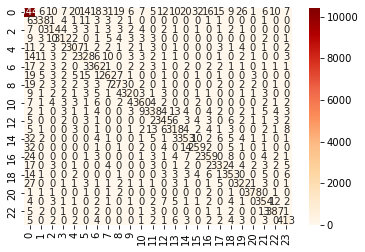

In [19]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.5980988398834772
MSE: 7.558082485817959
RMSE: 2.749196698277146


In [21]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.9264796257665685
Recall Score :  0.9264067051668625
f1_score :  0.9263931315415516


# KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'brute',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'uniform')
KNeighborsClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

0.03543257713317871 seconds


In [23]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 94.08187254050186


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     10731
           1       0.91      0.93      0.92       379
           2       0.89      0.90      0.90       365
           3       0.88      0.92      0.90       350
           4       0.87      0.91      0.89       357
           5       0.89      0.87      0.88       391
           6       0.91      0.87      0.89       431
           7       0.91      0.80      0.85       333
           8       0.90      0.88      0.89       321
           9       0.91      0.91      0.91       350
          10       0.91      0.88      0.90       403
          11       0.86      0.91      0.88       393
          12       0.91      0.90      0.91       395
          13       0.86      0.88      0.87       375
          14       0.81      0.83      0.82       417
          15       0.90      0.81      0.85       319
          16       0.92      0.83      0.88       410
 

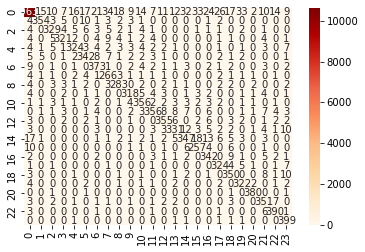

In [25]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.4782542035059028
MSE: 6.073695507742628
RMSE: 2.464486864996977


In [27]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9406550707323894
Recall Score :  0.9408187254050187
f1_score :  0.9401898216753617


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 100,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

197.93487763404846 seconds


In [29]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.20452803189043


Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     10731
           1       0.92      0.91      0.91       379
           2       0.94      0.87      0.90       365
           3       0.90      0.91      0.90       350
           4       0.91      0.88      0.90       357
           5       0.91      0.86      0.88       391
           6       0.91      0.86      0.89       431
           7       0.88      0.82      0.85       333
           8       0.86      0.88      0.87       321
           9       0.92      0.92      0.92       350
          10       0.93      0.91      0.92       403
          11       0.88      0.89      0.88       393
          12       0.91      0.90      0.90       395
          13       0.91      0.86      0.88       375
          14       0.83      0.87      0.85       417
          15       0.87      0.79      0.83       319
          16       0.90      0.86      0.88       410
 

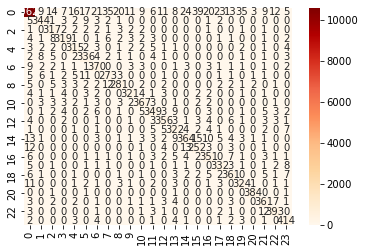

In [31]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.47089487402258906
MSE: 6.007563755302295
RMSE: 2.451033201591177


In [33]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9414449409421439
Recall Score :  0.9420452803189043
f1_score :  0.9414581606585022


# ExtraTreesClassifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import time
start_time = time.time()
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 100,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

17.372686862945557 seconds


In [35]:
y_pred5 = extratree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 94.50605611488731


Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     10731
           1       0.94      0.92      0.93       379
           2       0.95      0.87      0.90       365
           3       0.89      0.91      0.90       350
           4       0.90      0.89      0.89       357
           5       0.91      0.87      0.89       391
           6       0.91      0.86      0.89       431
           7       0.87      0.84      0.85       333
           8       0.87      0.89      0.88       321
           9       0.91      0.91      0.91       350
          10       0.93      0.92      0.93       403
          11       0.88      0.90      0.89       393
          12       0.92      0.90      0.91       395
          13       0.92      0.87      0.90       375
          14       0.85      0.87      0.86       417
          15       0.87      0.83      0.85       319
          16       0.92      0.89      0.90       410
 

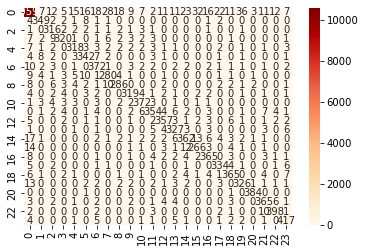

In [37]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.45709613124137577
MSE: 5.916083201308325
RMSE: 2.4322999817679407


In [39]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9446839819077633
Recall Score :  0.9450605611488732
f1_score :  0.9446899160536556


# XGBoost

In [40]:
from xgboost import XGBClassifier
import time
start_time = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print (time.time() - start_time, "seconds")

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\nafem\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:29:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
335.7418849468231 seconds


In [41]:
y_pred4 = xgb.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 89.46184903153268


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     10731
           1       0.88      0.84      0.86       379
           2       0.80      0.72      0.76       365
           3       0.74      0.82      0.78       350
           4       0.84      0.75      0.80       357
           5       0.83      0.73      0.78       391
           6       0.86      0.75      0.80       431
           7       0.75      0.72      0.73       333
           8       0.78      0.82      0.80       321
           9       0.87      0.81      0.84       350
          10       0.85      0.78      0.82       403
          11       0.77      0.74      0.75       393
          12       0.84      0.80      0.82       395
          13       0.79      0.75      0.77       375
          14       0.73      0.78      0.75       417
          15       0.84      0.73      0.78       319
          16       0.88      0.80      0.84       410
 

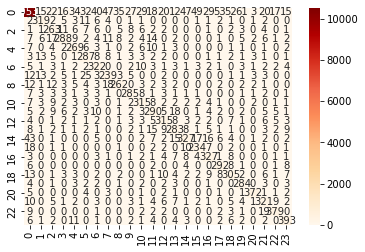

In [43]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.8982981550569837
MSE: 11.808708539888588
RMSE: 3.436380150665608


In [45]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8929491214287899
Recall Score :  0.8946184903153268
f1_score :  0.8927423053257607
